In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MATCH_RES.xlsx to MATCH_RES.xlsx


In [3]:
from google.colab import files
uploaded = files.upload()

Saving TOP__BOWLER__WPL.xlsx to TOP__BOWLER__WPL.xlsx


In [4]:
from google.colab import files
uploaded = files.upload()

Saving TOP_RUN_SEASON.xlsx to TOP_RUN_SEASON.xlsx


In [5]:
from google.colab import files
uploaded = files.upload()

Saving most_sixes.xlsx to most_sixes.xlsx


In [6]:
from google.colab import files
uploaded = files.upload()

Saving points_table.xlsx to points_table.xlsx


In [70]:
df1 = pd.read_excel("/content/MATCH_RES.xlsx")
df2 = pd.read_excel("/content/TOP_RUN_SEASON.xlsx")
df3 = pd.read_excel("/content/TOP__BOWLER__WPL.xlsx")
df4 = pd.read_excel("/content/most_sixes.xlsx")
df5 = pd.read_excel("/content/points_table.xlsx")


In [71]:
df1.head()
df2.head()
df3.head()
df4.head()

,BATTER,MATCHES,INNS,RUNS,6s
0,Harmanpreet Kaur,8,8,342,13
1,Sophie Devine,9,9,243,13
2,Lizelle Lee,10,10,320,11
3,Richa Ghosh,9,9,189,11
4,Phoebe Litchfield,6,6,243,10


In [12]:
print("Match Shape:", df1.shape)
print("Batting Shape:", df2.shape)
print("Bowler Shape:", df3.shape)
print("Sixes Shape:", df4.shape)
print("points table Shape:", df5.shape)

Match Shape: (22, 12)
Batting Shape: (15, 9)
Bowler Shape: (15, 10)
Sixes Shape: (15, 5)
points table Shape: (15, 5)


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PLAYER   15 non-null     object 
 1   MATCHES  15 non-null     int64  
 2   INNS     15 non-null     int64  
 3   RUNS     15 non-null     int64  
 4   AVG      15 non-null     float64
 5   SR       15 non-null     float64
 6   4s       15 non-null     int64  
 7   6s       15 non-null     int64  
 8   TEAM     15 non-null     object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.2+ KB


In [14]:
df2.isnull().sum()

,0
PLAYER,0
MATCHES,0
INNS,0
RUNS,0
AVG,0
SR,0
4s,0
6s,0
TEAM,0


In [15]:
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)


In [17]:
top10_runs = df2.sort_values(by="RUNS", ascending=False).head(10)
top10_runs

,PLAYER,MATCHES,INNS,RUNS,AVG,SR,4s,6s,TEAM
0,Smriti Mandhana,9,9,377,53.86,153.25,57,9,Royal Challengers Bengaluru Women
1,Harmanpreet Kaur,8,8,342,68.40,150.66,36,13,Mumbai Indians Women
2,Nat Sciver-Brunt,7,7,321,64.20,151.42,48,4,Mumbai Indians Women
3,Lizelle Lee,10,10,320,32.00,139.13,46,11,Delhi Capitals Women
4,Laura Wolvaardt,10,10,317,45.29,135.47,31,8,Delhi Capitals Women
5,Jemimah Rodrigues,10,10,264,33.00,141.94,33,2,Delhi Capitals Women
6,Shafali Verma,10,10,259,25.90,125.12,39,4,Delhi Capitals Women
7,Beth Mooney,9,9,258,32.25,122.27,28,2,Gujarat Giants Women
8,Meg Lanning,8,8,248,31.00,125.25,37,5,UP Warriorz Women
9,Ashleigh Gardner,9,9,244,27.11,141.86,26,8,Gujarat Giants Women


In [18]:
total_runs = df2["RUNS"].sum()
top5 = df2.sort_values(by="RUNS", ascending=False).head(5)
top5_runs = top5["RUNS"].sum()
percentage = (top5_runs / total_runs) * 100
percentage

np.float64(41.509900990099005)

In [21]:
df2["Average_Run"] = df2["RUNS"] /df2["MATCHES"]
df2.sort_values(by="Average_Run", ascending=False).head(5)

,PLAYER,MATCHES,INNS,RUNS,AVG,SR,4s,6s,TEAM,Average_Run
2,Nat Sciver-Brunt,7,7,321,64.20,151.42,48,4,Mumbai Indians Women,45.857143
1,Harmanpreet Kaur,8,8,342,68.40,150.66,36,13,Mumbai Indians Women,42.750000
0,Smriti Mandhana,9,9,377,53.86,153.25,57,9,Royal Challengers Bengaluru Women,41.888889
11,Phoebe Litchfield,6,6,243,40.50,154.78,30,10,UP Warriorz Women,40.500000
3,Lizelle Lee,10,10,320,32.00,139.13,46,11,Delhi Capitals Women,32.000000


In [24]:
df3["BALLS"] = pd.to_numeric(df3["BALLS"], errors='coerce')
df3["Bowling_SR"] = df3["BALLS"] / df3["WKTS"]
df3.sort_values(by="Bowling_SR").head(5)

,PLAYER,MATCHES,OVERS,BALLS,WKTS,Avg,RUNS,4-FERS,5-FERS,TEAM,Bowling_SR
0,Sophie Devine,9,32.5,197.0,17,16.00,272,1,0,Gujarat Giants Women,11.588235
2,Nadine de Klerk,9,32.0,192.0,16,15.69,251,2,0,Royal Challengers Bengaluru Women,12.000000
3,Amelia Kerr,7,28.0,168.0,14,15.00,210,0,0,Mumbai Indians Women,12.000000
7,Rajeshwari Gayakwad,8,22.0,132.0,11,16.18,178,0,0,Gujarat Giants Women,12.000000
5,Chinelle Henry,8,29.0,174.0,14,17.79,249,0,0,Delhi Capitals Women,12.428571


In [65]:
df2[["RUNS", "SR"]].corr()


,RUNS,SR
RUNS,1.000000,-0.002467
SR,-0.002467,1.000000


In [ ]:
df1

In [25]:
pd.crosstab(df1['Toss Winner'],df1['Result'])

Result,DC Women won by 5 wickets,DC Women won by 7 wickets,DC-W won by 7 wickets,Delhi Capitals Women won,GG Women won by 10 runs,GG Women won by 11 runs,GG Women won by 3 wickets,GG Women won by 4 runs,GG won by 10 runs,MI Women won by 15 runs,...,MI Women won by 7 wickets,RCB Women won by 3 wickets,RCB Women won by 32 runs,RCB Women won by 6 wickets,RCB Women won by 8 wickets,RCB Women won by 8 wickets,RCB Women won by 9 wickets,RCB won by 61 runs,UP Warriorz Women won by 22 runs,UP Warriorz Women won by 7 wickets
Toss Winner,,,,,,,,,,,,,,,,,,,,,
Royal Challengers Bengaluru Women,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Delhi Capitals Women,1,1,2,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Gujarat Giants Women,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Mumbai Indians Women,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Royal Challengers Bengaluru Women,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,1,1,0,0,0
UP Warriorz Women,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [26]:
toss_winner=df1['Toss Winner'].value_counts()
toss_winner

,count
Toss Winner,
Delhi Capitals Women,7
Royal Challengers Bengaluru Women,6
Gujarat Giants Women,3
UP Warriorz Women,3
Mumbai Indians Women,2
Royal Challengers Bengaluru Women,1


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Delhi Capitals Women'),
  Text(1, 0, 'Royal Challengers Bengaluru Women'),
  Text(2, 0, 'Gujarat Giants Women'),
  Text(3, 0, 'UP Warriorz Women'),
  Text(4, 0, 'Mumbai Indians Women'),
  Text(5, 0, ' Royal Challengers Bengaluru Women')])

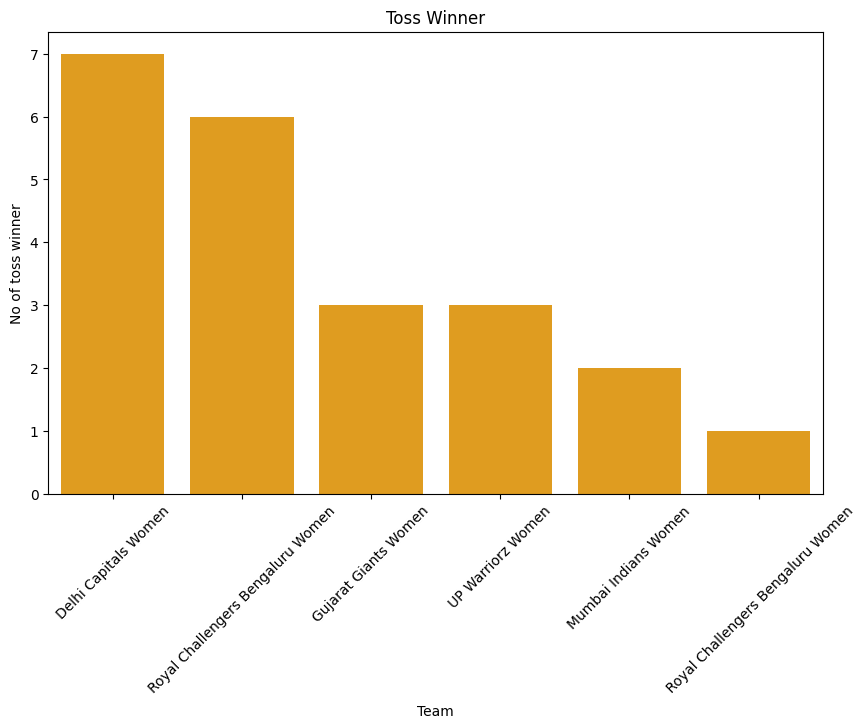

In [60]:
plt.figure(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(toss_winner)))
sns.barplot(x=toss_winner.index,y=toss_winner,color="orange")
plt.title("Toss Winner")
plt.xlabel("Team")
plt.ylabel("No of toss winner")
plt.xticks(rotation=45)

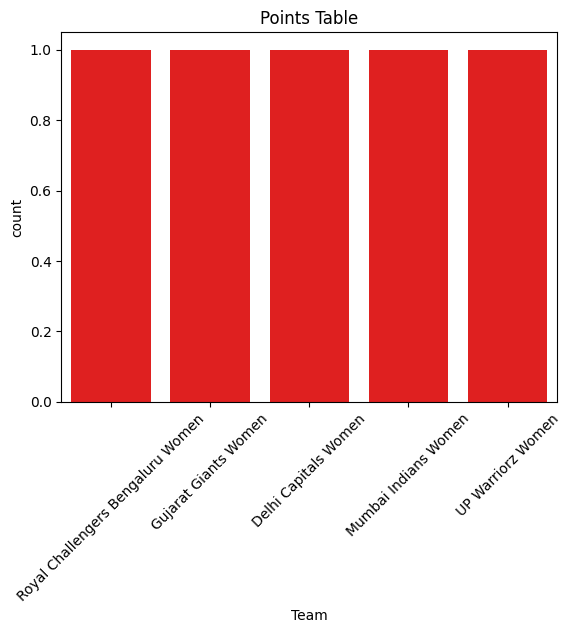

In [76]:
sns.countplot(x="Team", data=df5,color="red")
plt.title("Points Table")
plt.xticks(rotation=45)
plt.show()

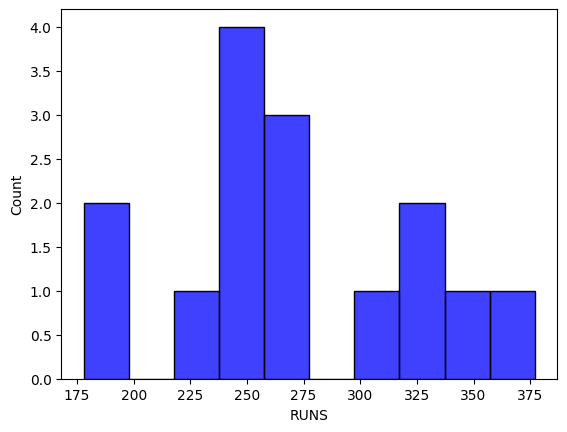

In [84]:
sns.histplot(df2["RUNS"], bins=10,color="blue")
plt.show()

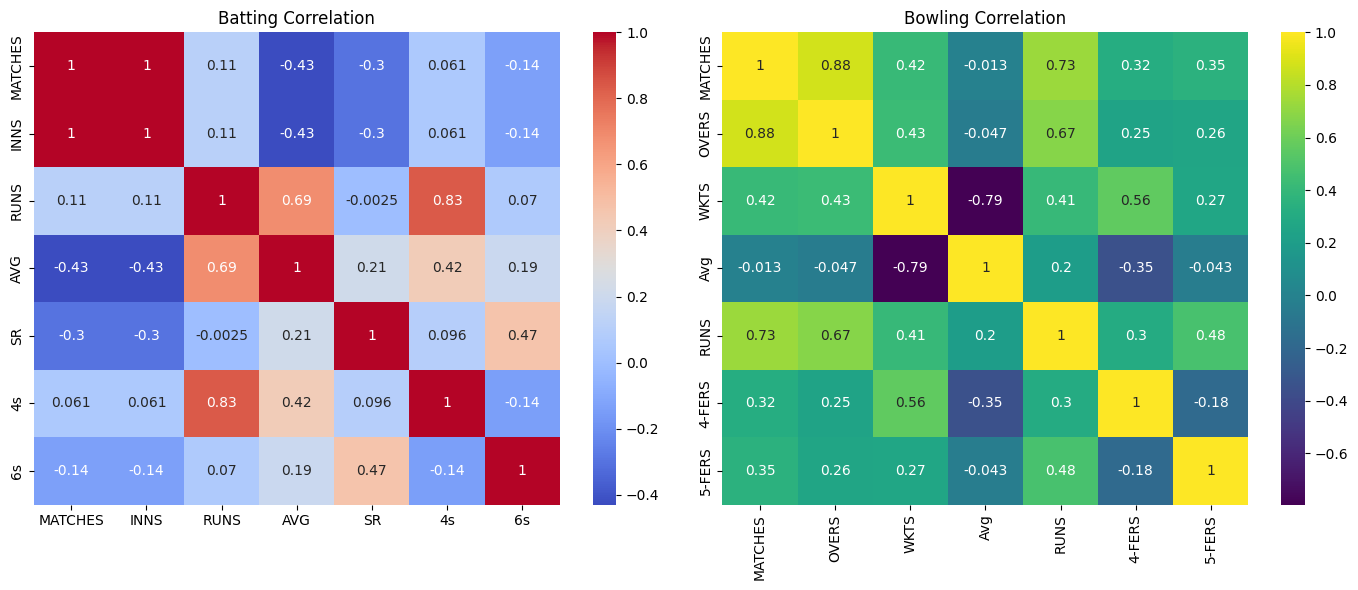

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
bat_corr = df2.corr(numeric_only=True)
bowl_corr =df3.corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.heatmap(bat_corr, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Batting Correlation")
sns.heatmap(bowl_corr, annot=True, cmap="viridis", ax=axes[1])
axes[1].set_title("Bowling Correlation")
plt.tight_layout()
plt.show()
